## Observations and Insights 

In [ ]:
Include a written description of at least three observations and/or inferences that can be made from the data

There were slightly more male rats in the study than female rats. 
The greatest number of rats were given Capomulin, as opposed to other drug regimens. 
249 mice were tested in this experiment. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mouse_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numbermice = combined_mouse_data['Mouse ID'].nunique()
numbermice


249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated = combined_mouse_data.duplicated()

ids = combined_mouse_data["Mouse ID"]
combined_mouse_data[ids.isin(ids[ids.duplicated()])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_data.drop_duplicates(subset= ['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_mouse_data.groupby("Drug Regimen").describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

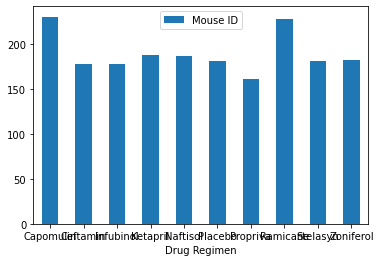

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugdf = combined_mouse_data.groupby("Drug Regimen").count()
drugdf.plot.bar(y='Mouse ID', rot=0)


<AxesSubplot:xlabel='Drug Regimen'>

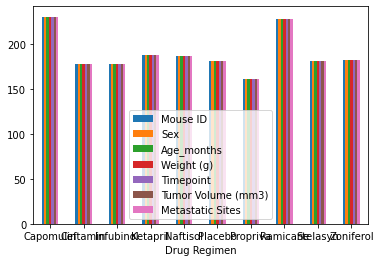

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugdf.plot.bar(rot=0)

([<matplotlib.patches.Wedge at 0x1d6c2ed5e80>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

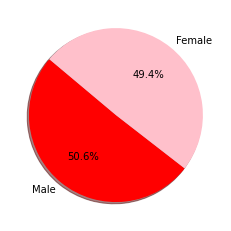

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexplot = combined_mouse_data.groupby("Sex").count()
sexplot

labels = ["Male", "Female"]

sizes = [958, 935]

colors = ["red", "pink"]


plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genderpandas = pd.combined_mouse_data({'Sex': [958, 935], index=['Male', 'Female'])
plot = genderpandas.plot.pie(y='Sex', figsize=(5, 5))


SyntaxError: invalid syntax (<ipython-input-54-4d9998170865>, line 3)

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_mouse_data.groupby('Drug Regimen').drop(['Zoniferol', 'Ketapril', 'Placebo', 'Propriva', 'Stelasyn'])

# Start by getting the last (greatest) timepoint for each mouse

combined_mouse_data.sort_values('Drug Regimen').drop_duplicates(["Timepoint"],keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


AttributeError: 'DataFrameGroupBy' object has no attribute 'drop'

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

AxesSubplot(0.125,0.125;0.775x0.755)


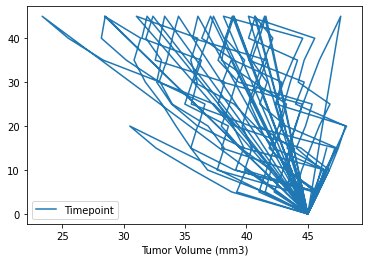

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin"]

lines = capomulin.plot.line(x='Tumor Volume (mm3)', y='Timepoint')
print(lines)



<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

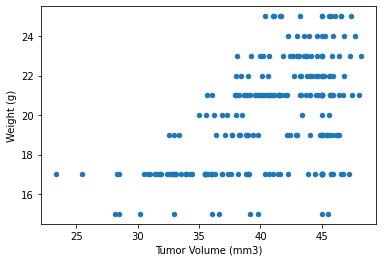

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin.plot.scatter(x='Tumor Volume (mm3)',
                      y='Weight (g)')

## Correlation and Regression

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

coefficient = capomulin['Weight (g)'].corr('Tumor Volume (mm3)')
coefficient



TypeError: unsupported type: <class 'str'>